In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('../data/processed/preprocessed_data.csv')
dff = df.copy()

In [50]:
df.shape

(3730, 22)

In [51]:
df.columns.tolist()

['page_number',
 'frontend_id',
 'title',
 'titleSlug',
 'difficulty',
 'is_premium',
 'topic_tags',
 'num_tags',
 'similar_questions',
 'no_similar_questions',
 'acceptance',
 'accepted',
 'submission',
 'acceptance_rate',
 'discussion_count',
 'likes',
 'dislikes',
 'like_ratio',
 'likebility',
 'is_popular',
 'problem_URL',
 'solution_URL']

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isnull().sum()[(df.isnull().sum() != 0)].sort_values()

solution_URL    739
dtype: int64

In [54]:
df.sample(5)

,page_number,frontend_id,title,titleSlug,difficulty,is_premium,topic_tags,num_tags,similar_questions,no_similar_questions,...,submission,acceptance_rate,discussion_count,likes,dislikes,like_ratio,likebility,is_popular,problem_URL,solution_URL
228,5,229,Majority Element II,majority-element-ii,Medium,False,"['Array', 'Hash Table', 'Sorting', 'Counting']",46,"[""['Majority Element'"", ""'Check If a Number Is...",3.0,...,2022717,55.27,179,10725,480,0.96,96.0,True,https://leetcode.com/problems/majority-element...,https://leetcode.com/problems/majority-element...
1884,38,1885,Count Pairs in Two Arrays,count-pairs-in-two-arrays,Medium,True,"['Array', 'Two Pointers', 'Binary Search', 'So...",53,"[""['Max Value of Equation'"", ""'Substrings That...",2.0,...,19593,60.25,7,244,23,0.91,91.0,False,https://leetcode.com/problems/count-pairs-in-t...,NaN
2459,50,2460,Apply Operations to an Array,apply-operations-to-an-array,Easy,False,"['Array', 'Two Pointers', 'Simulation']",39,"[""['Remove Duplicates from Sorted Array'"", ""'M...",2.0,...,347226,74.73,175,1097,64,0.94,94.0,True,https://leetcode.com/problems/apply-operations...,https://leetcode.com/problems/apply-operations...
1858,38,1859,Sorting the Sentence,sorting-the-sentence,Easy,False,"['String', 'Sorting']",21,"[""['Check if Numbers Are Ascending in a Senten...",1.0,...,261874,83.95,32,2358,81,0.97,97.0,True,https://leetcode.com/problems/sorting-the-sent...,https://leetcode.com/problems/sorting-the-sent...
1808,37,1809,Ad-Free Sessions,ad-free-sessions,Easy,True,['Database'],12,['[]'],1.0,...,32057,58.70,9,97,61,0.61,61.0,False,https://leetcode.com/problems/ad-free-sessions/,NaN


In [55]:
fig = go.Figure(
    data=[go.Pie(
        labels=['Non-Premium', 'Premium'],
        values=df['is_premium'].value_counts().values.tolist(),
        insidetextfont=dict(color='black', size=16)
    )]
)

fig.update_layout(
    title_text='LeetCode Problem Premium Status',
    title_font=dict(size=20),
    title_x=0.45
)
fig.show()

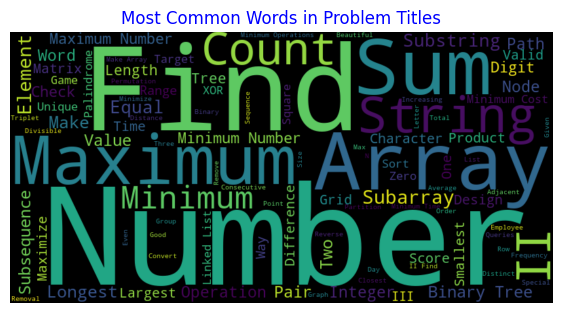

In [56]:
wordcloud = WordCloud(
    width=800, height=400, max_words=100, background_color='black'
).generate(' '.join(df['title']))
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Problem Titles', color='blue')
plt.show()

In [57]:
fig = px.pie(
    df,
    names='difficulty',
    title='LeetCode Difficulty Level Distribution',
    color_discrete_sequence=['#00CED1', '#FF8C00', '#FFD700']
)
fig.show()

In [58]:
df['acceptance'].describe()

count    3730.000000
mean       56.681511
std        17.044996
min         8.113445
25%        44.586442
50%        57.006188
75%        68.928061
max        96.188341
Name: acceptance, dtype: float64

In [59]:
df['acceptance'].skew()

np.float64(-0.14002192686369958)

In [60]:
df['acceptance'].kurt()

np.float64(-0.5319931659872461)

In [61]:
import plotly.express as px

fig = px.histogram(
    df,
    x='acceptance',
    marginal='box',
    nbins=10,
    color_discrete_sequence=['#FF8C00']  # orange bars
)

fig.update_layout(
    template='plotly_white',  # light theme
    title_text='Distribution of Acceptance Rates',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.33,
    xaxis_title='Acceptance Rate',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 110, 10))),
    font=dict(color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_traces(
    marker_line_color='white',
    marker_line_width=1,
    opacity=0.9
)

fig.show()


In [62]:
tag_counts = df['topic_tags'].str.split(', ').explode().value_counts().head(10).reset_index()
tag_counts.columns = ['topic_tags', 'count']

fig = px.bar(
    tag_counts, x='count', y='topic_tags', orientation='h',
    title='Top 10 Most Common Topic Tags', text_auto=True,
    color_discrete_sequence=['#FF8C00']
)
fig.show()

In [63]:
numeric_cols = ['accepted', 'submission', 'discussion_count', 'likes', 'dislikes', 'acceptance']
print(df[numeric_cols].describe().T)

                   count           mean           std        min  \
accepted          3730.0  275699.417694  7.258735e+05  69.000000   
submission        3730.0  484868.267560  1.359679e+06  91.000000   
discussion_count  3730.0      75.925737  1.043497e+02   0.000000   
likes             3730.0    2106.630027  4.017397e+03   2.000000   
dislikes          3730.0     308.843968  8.807048e+02   0.000000   
acceptance        3730.0      56.681511  1.704500e+01   8.113445   

                           25%            50%            75%           max  
accepted          18867.500000   68017.000000  212242.250000  1.929370e+07  
submission        43204.250000  116378.500000  335637.000000  3.416496e+07  
discussion_count     14.000000      29.000000     112.000000  1.646000e+03  
likes               176.000000     676.500000    2088.000000  6.512300e+04  
dislikes             23.000000      80.500000     263.000000  2.021300e+04  
acceptance           44.586442      57.006188      68.928061 

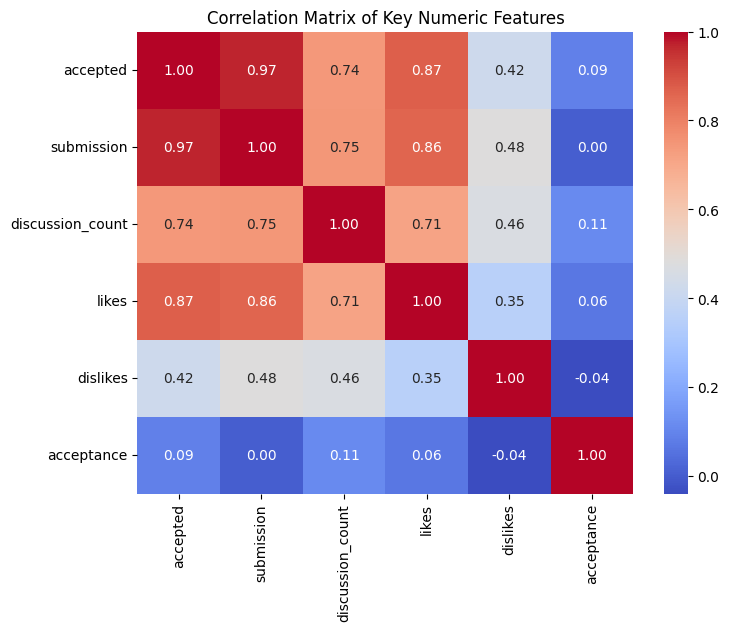

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Numeric Features")
plt.show()

In [65]:
no_similar_df = df[df['no_similar_questions'].notna()]['no_similar_questions'].apply(round).value_counts(ascending=True).reset_index()
no_similar_df.loc[no_similar_df['count'] < 100, 'index'] = 'Other'
no_similar_df.loc[no_similar_df['count'] >= 100, 'index'] = no_similar_df.loc[no_similar_df['count'] >= 100, 'count']

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Other','Other','Other','Other','Other','Other','Other','Other','Other',
                    'Other','Other','Other','3 Question','2 Question','1 Question','No Question'],
            values=no_similar_df['count'].tolist(),
            marker=dict(
                line=dict(color='#000000', width=2)
            )
        )
    ]
)

fig.update_layout(
    title_text='Distribution of Number of Similar Questions',
    title_font=dict(size=20, family='Arial', color='white'),
    title_x=0.27,
)

fig.update_traces(
    textinfo='percent+label',
    hoverinfo='label+percent',
        textfont=dict(
        family='Arial',
        size=17,
        color='black',
    ),
    textposition='inside'
)

fig.show()

In [66]:
df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']].describe()

,accepted,submission,discussion_count,likes,dislikes
count,3.730000e+03,3.730000e+03,3730.000000,3730.000000,3730.000000
mean,2.756994e+05,4.848683e+05,75.925737,2106.630027,308.843968
std,7.258735e+05,1.359679e+06,104.349659,4017.397316,880.704764
min,6.900000e+01,9.100000e+01,0.000000,2.000000,0.000000
25%,1.886750e+04,4.320425e+04,14.000000,176.000000,23.000000
50%,6.801700e+04,1.163785e+05,29.000000,676.500000,80.500000
75%,2.122422e+05,3.356370e+05,112.000000,2088.000000,263.000000
max,1.929370e+07,3.416496e+07,1646.000000,65123.000000,20213.000000


In [67]:
np.log10(df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']]+1).skew()

accepted           -0.217541
submission         -0.264899
discussion_count   -0.028055
likes              -0.343277
dislikes           -0.070816
dtype: float64

In [68]:
np.log10(df[['accepted', 'submission', 'discussion_count', 'likes','dislikes']]+1).kurt()

accepted            0.015725
submission          0.519241
discussion_count   -0.557873
likes              -0.224829
dislikes           -0.331326
dtype: float64

In [69]:
# Create a subplot layout
fig = make_subplots(rows=1, cols=1)

# Create box plots for each column
for col in ['accepted', 'submission', 'discussion_count', 'likes', 'dislikes']:
    # Add a box plot trace for each column
    fig.add_trace(go.Box(y=np.log10(df[col]+1), name=col.capitalize(), width=0.6), row=1, col=1)

fig.update_layout(
    template="plotly_white",  # <-- Light background theme
    title_text='Comparison of User Engagement Metrics',
    title_font=dict(size=20, family='Arial', color='black'),
    title_x=0.45,
    xaxis_title='Metrics',
    yaxis_title='Log Values',
    boxmode='group'
)


# Show the plot
fig.show()

In [70]:
dfs =[]

for page_number in df['page_number'].unique():
    temp_df = df[df['page_number'] == page_number]
    premium_count = temp_df[temp_df['is_premium'] == True].shape[0]
    non_premium_count = temp_df[temp_df['is_premium'] == False].shape[0]
    temp_result_df = pd.DataFrame(
        {
            'page_number': [page_number],
            'Premium': [premium_count],
            'Non Premium': [non_premium_count]
        }
    )
    dfs.append(temp_result_df)

result_df = pd.concat(dfs, ignore_index=True)

fig = px.bar(
    result_df,
    x='page_number',
    y=['Non Premium', 'Premium'],
    color_discrete_map={ 'Non Premium': '#3330E4', 'Premium': '#FF0060'},
    width=750
)

fig.update_layout(
    title_text='Analysis of Premium and Non-Premium Problem Frequencies Across Pages',
    title_font=dict(size=15, family='Arial', color='red'),
    xaxis_title='Page Number',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(0, 62, 1))),
    legend_title_text='Premium Status',
    title_x=0.45,
    width=750,
    height=450
)

fig.update_layout(xaxis=dict(tickfont=dict(size=9)), bargap=0)
fig.show()

In [71]:
fig = px.box(
    df, x='difficulty', y='acceptance', color='difficulty',
    title='Acceptance Rate by Difficulty Level'
)
fig.show()

In [72]:
fig = px.box(
    df, x='is_premium', y='acceptance', color='is_premium',
    title='Premium vs Non-Premium: Acceptance Rate Comparison'
)
fig.show()

premium_accept = df[df['is_premium'] == True]['acceptance']
non_premium_accept = df[df['is_premium'] == False]['acceptance']
stat, pval = ttest_ind(premium_accept, non_premium_accept, equal_var=False)
print(f"T-Test Premium vs Non-Premium: t={stat:.3f}, p-value={pval:.5f}")
if pval < 0.05:
    print("→ Statistically significant difference in acceptance between Premium and Non-Premium problems.")
else:
    print("→ No significant difference found.")

T-Test Premium vs Non-Premium: t=9.334, p-value=0.00000
→ Statistically significant difference in acceptance between Premium and Non-Premium problems.


In [73]:
page_number = 60
topic_frequency_per_page = []

for page in range(1, page_number + 1):
    temp_df = df[df['page_number'] == page]
    temp_ds = temp_df['topic_tags'].str.split(',').explode().value_counts()
    temp_ds_head = temp_ds.head(1)
    if temp_ds_head.shape[0] != 0:
        topic = temp_ds_head.index[0].replace("'", "").strip()
        frequency = round(((temp_ds_head.values[0] / temp_ds.sum()) * 100), 2)
        topic_frequency_per_page.append([page, topic, frequency])

temp_df = pd.DataFrame(topic_frequency_per_page, columns=['page_number', 'topic_tag', 'contribution'])

In [74]:
temp_df['contribution'].min(), temp_df['contribution'].max()

(np.float64(11.05), np.float64(23.08))

In [75]:
topic_df = df.assign(topic=df['topic_tags'].str.split(', ')).explode('topic')
topic_stats = (
    topic_df.groupby('topic')
    .agg({
        'acceptance': 'mean',
        'likes': 'mean',
        'discussion_count': 'mean',
        'frontend_id': 'count'
    })
    .rename(columns={'frontend_id': 'problem_count'})
    .sort_values(by='problem_count', ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    topic_stats, x='topic', y='acceptance',
    title='Average Acceptance Rate by Top 10 Topics',
    text_auto='.2f', color='acceptance'
)
fig.show()

In [76]:
fig = px.scatter(
    df,
    x='submission',
    y='acceptance_rate',
    color='difficulty',
    size='likes',
    hover_data=['title'],
    title='Acceptance Rate vs Submissions by Difficulty',
    trendline='lowess',
    template='plotly_white'
)
fig.update_layout(height=600, width=900)
fig.show()


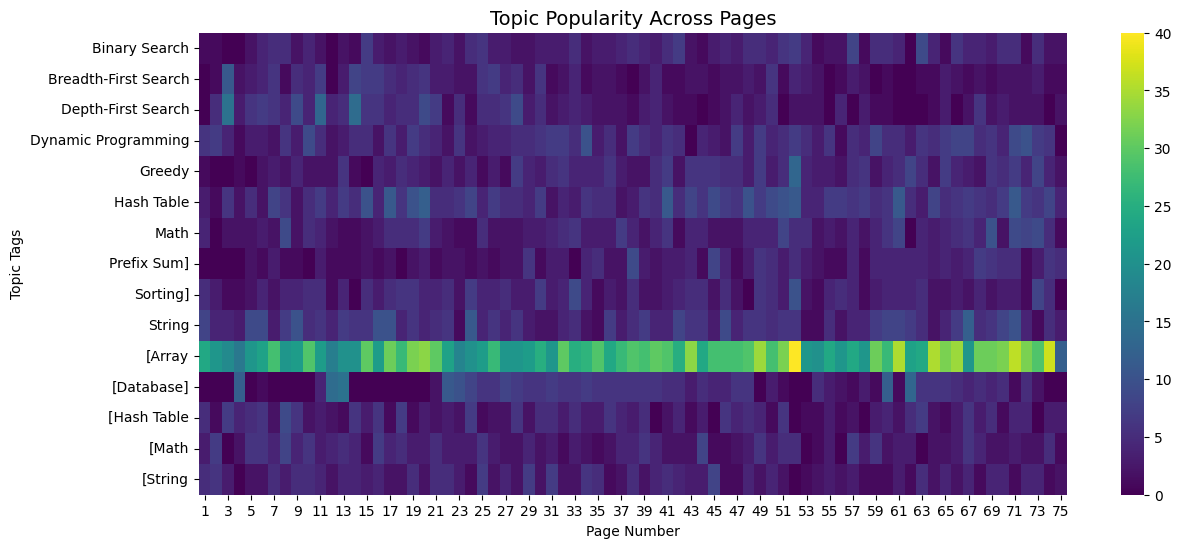

In [77]:
# explode topic tags
topic_page = df.copy()
topic_page['topic_tags'] = topic_page['topic_tags'].str.replace("'", "").str.split(',')
topic_page = topic_page.explode('topic_tags')
topic_page['topic_tags'] = topic_page['topic_tags'].str.strip()

# get top 15 topics overall
top_topics = topic_page['topic_tags'].value_counts().head(15).index
heatmap_df = (
    topic_page[topic_page['topic_tags'].isin(top_topics)]
    .groupby(['page_number','topic_tags']).size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_df.T, cmap='viridis')
plt.title("Topic Popularity Across Pages", fontsize=14)
plt.xlabel("Page Number")
plt.ylabel("Topic Tags")
plt.show()


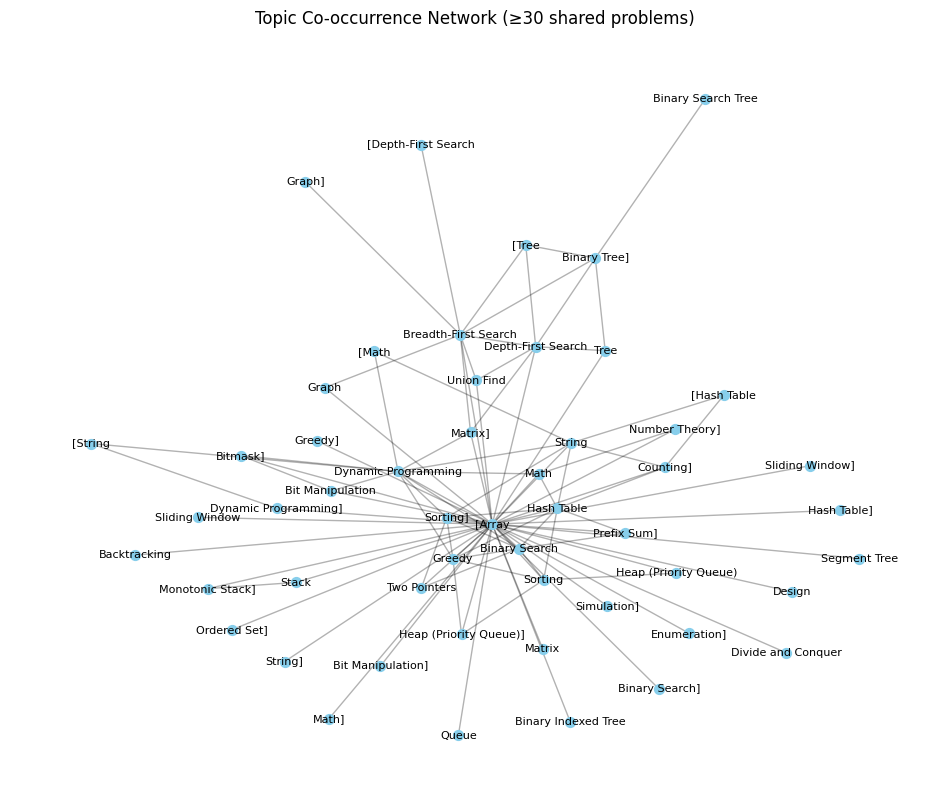

In [78]:
from itertools import combinations
from collections import Counter
import networkx as nx

# prepare co-occurrence pairs
topic_pairs = []
for tags in df['topic_tags'].dropna():
    clean = [t.strip().replace("'", "") for t in tags.split(',')]
    topic_pairs.extend(list(combinations(sorted(set(clean)), 2)))

pair_counts = Counter(topic_pairs)
edges = [(a,b,w) for (a,b),w in pair_counts.items() if w>30]  # adjust threshold

G = nx.Graph()
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(12,10))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Topic Co-occurrence Network (≥30 shared problems)")
plt.axis('off')
plt.show()

In [79]:
funnel = pd.DataFrame({
    'Stage': ['Submissions', 'Accepted', 'Likes', 'Discussions'],
    'Value': [
        df['submission'].sum(),
        df['accepted'].sum(),
        df['likes'].sum(),
        df['discussion_count'].sum()
    ]
})

fig = go.Figure(go.Funnel(
    y=funnel['Stage'],
    x=funnel['Value'],
    textinfo='value+percent initial',
    marker={"color": ["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728"]}
))
fig.update_layout(title="Engagement Funnel of LeetCode Problems", template='plotly_white')
fig.show()

In [80]:
# Create acceptance_to_submission ratio if missing
if 'acceptance_to_submission' not in df.columns:
    df['acceptance_to_submission'] = (df['accepted'] / (df['submission'] + 1)).round(4)

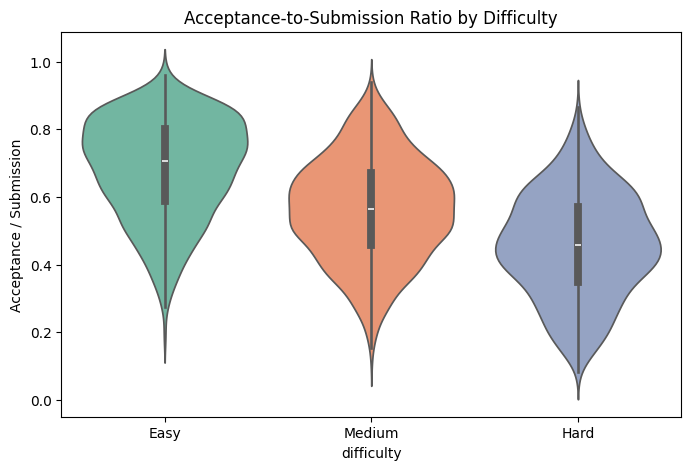

In [81]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='difficulty', y='acceptance_to_submission', palette='Set2', inner='box')
plt.title('Acceptance-to-Submission Ratio by Difficulty')
plt.ylabel('Acceptance / Submission')
plt.show()

In [82]:
# explode again
topic_df = df.copy()
topic_df['topic_tags'] = topic_df['topic_tags'].str.replace("'", "").str.split(',')
topic_df = topic_df.explode('topic_tags')
topic_df['topic_tags'] = topic_df['topic_tags'].str.strip()

fig = px.treemap(
    topic_df,
    path=['difficulty', 'topic_tags'],
    values='frontend_id',
    color='difficulty',
    title='Topic Hierarchy by Difficulty',
    color_discrete_map={'Easy':'green','Medium':'gold','Hard':'red'}
)
fig.show()

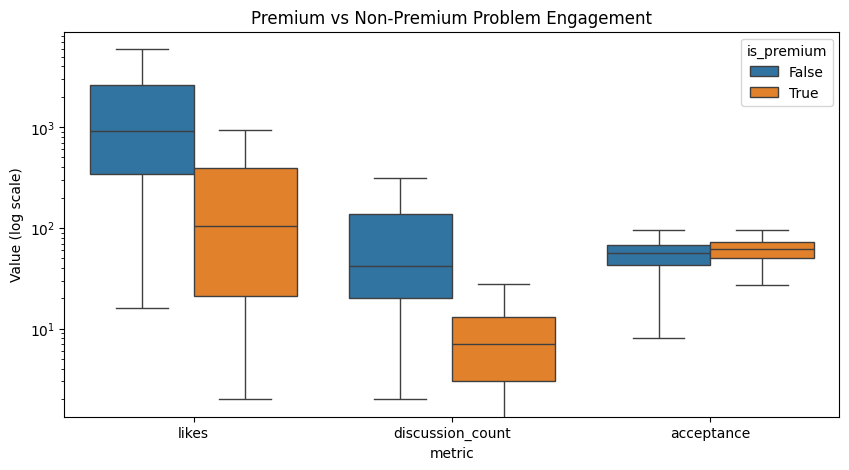

In [83]:
melt_df = df.melt(
    id_vars=['difficulty','is_premium'],
    value_vars=['likes','discussion_count','acceptance'],
    var_name='metric',
    value_name='value'
)

plt.figure(figsize=(10,5))
sns.boxplot(data=melt_df, x='metric', y='value', hue='is_premium', showfliers=False)
plt.yscale('log')
plt.title('Premium vs Non-Premium Problem Engagement')
plt.ylabel('Value (log scale)')
plt.show()